In [1]:
import random
import pandas as pd

In [2]:
d1=[]
d2=[]
d3=[]
d4=[]
for i in range(50000):
    x=random.random()
    d1.append(x)
    y=random.random()
    d2.append(y)
    z=random.random()
    d3.append(z)
    d4.append(2*x+3*y+z)

In [3]:
df=pd.DataFrame({'x1':d1,'x2':d2,'x3':d3,'x4':d4},index=range(0,50000))

In [4]:
X = df.iloc[:,0:3]
Y = df.iloc[:,3]

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
model = tf.keras.models.Sequential([  
  tf.keras.layers.Dense(9,input_dim=3, activation='relu'),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs=20)

Train on 40000 samples
Epoch 1/20
40000/40000 [==============================] - 2s 42us/sample - loss: 2.4319 - accuracy: 0.0000e+00
Epoch 2/20
40000/40000 [==============================] - 2s 39us/sample - loss: 7.0290e-05 - accuracy: 0.0000e+00
Epoch 3/20
40000/40000 [==============================] - 2s 39us/sample - loss: 2.9023e-05 - accuracy: 0.0000e+00
Epoch 4/20
40000/40000 [==============================] - 2s 40us/sample - loss: 1.5574e-05 - accuracy: 0.0000e+00
Epoch 5/20
40000/40000 [==============================] - 2s 40us/sample - loss: 7.8879e-06 - accuracy: 0.0000e+00
Epoch 6/20
40000/40000 [==============================] - 2s 46us/sample - loss: 3.6802e-06 - accuracy: 0.0000e+00
Epoch 7/20
40000/40000 [==============================] - 2s 58us/sample - loss: 1.7511e-06 - accuracy: 0.0000e+00
Epoch 8/20
40000/40000 [==============================] - 2s 48us/sample - loss: 1.0328e-06 - accuracy: 0.0000e+00
Epoch 9/20
40000/40000 [==============================] - 2s 

In [14]:
y_pred=model.predict(X_test)

In [15]:
from sklearn.metrics import r2_score

In [16]:
r2_score(y_pred, y_test)

0.9999955164944659

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

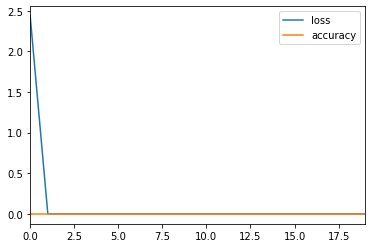

In [18]:
metrics_df = pd.DataFrame(model.history.history)
metrics_df.plot()